In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import healpy as hp

In [2]:
# Set the database and query
database = 'minion_1016_sqlite.db'
#sqlWhere = 'filter = "r" and night < 400'
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)
nside=512


In [12]:
bundleList = []
sql = 'filter = "r" and night < 400 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True)
metric = metrics.CountMetric('expMJD')

bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [13]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 290 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_400_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0" constraint now.
Plotting complete.


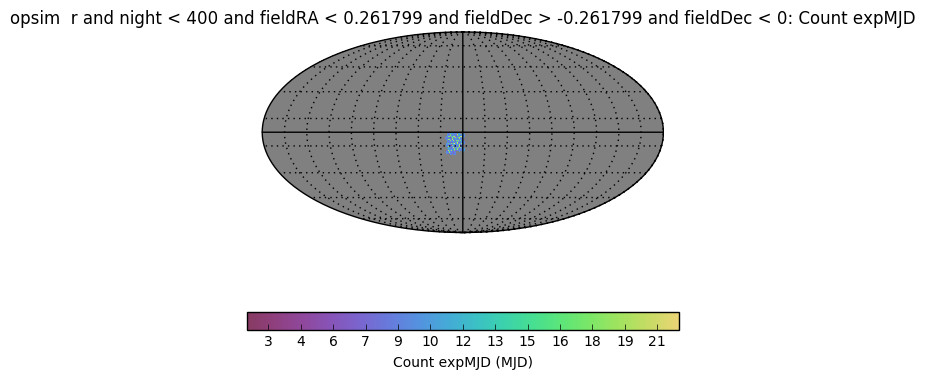

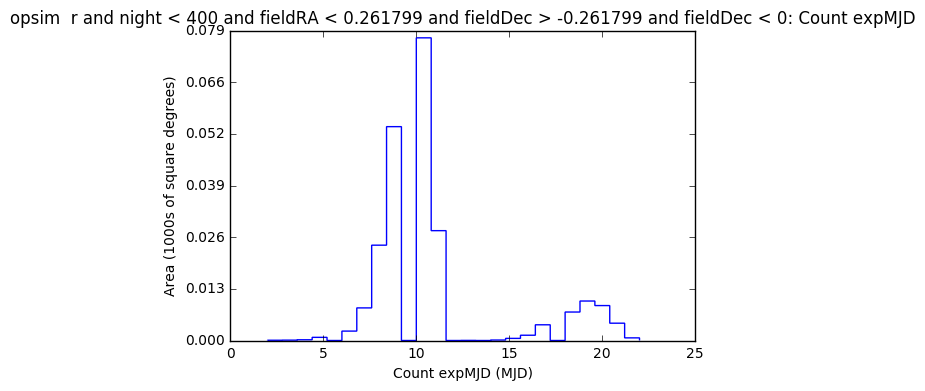

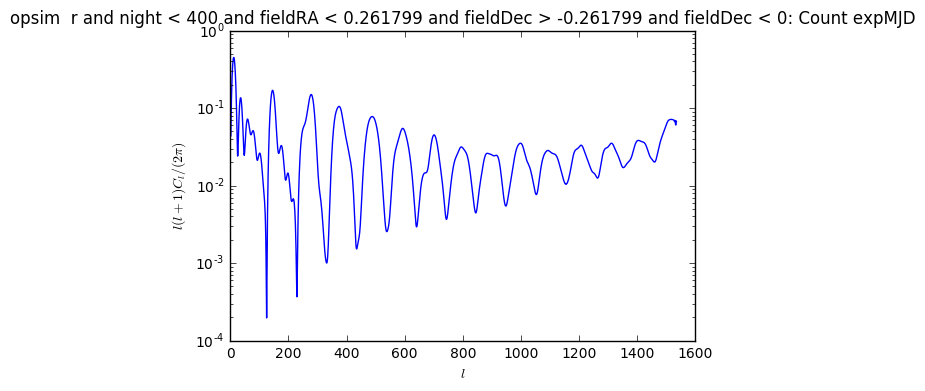

In [14]:
bgroup.plotAll(closefigs=False)

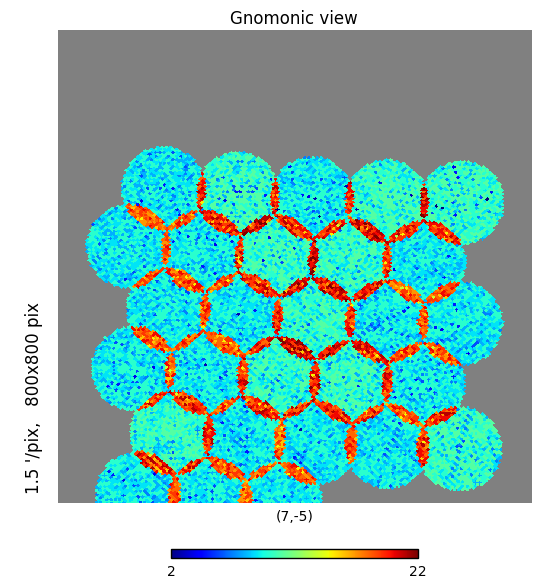

In [18]:
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))

In [21]:
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=2.)
bundleList = []
bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


Querying database with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 290 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_400_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


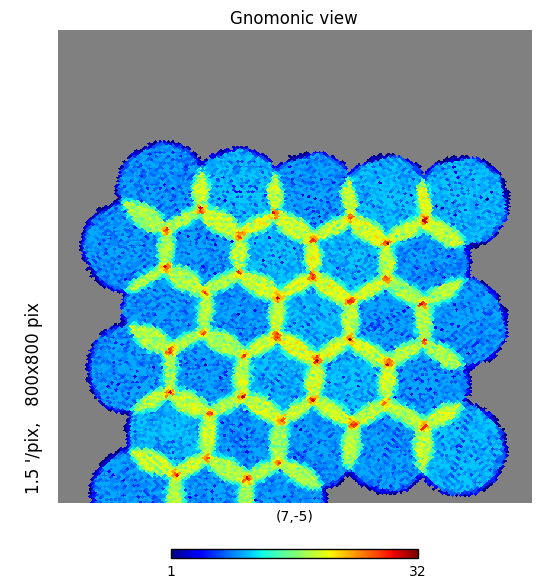

In [22]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))

In [32]:
bundleList = []
slicer = slicers.HealpixSlicer(nside=1024, useCamera=True, radius=2.)
#sql = 'filter = "r" and night < 204 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
sql = 'filter = "r" and expMJD < 59783.3 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
bundleList.append(metricBundles.MetricBundle(metric,slicer, sql))

Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes


Querying database with constraint filter = "r" and expMJD < 59783.3 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 4 visits
Running:  ['opsim_Count_expMJD_r_and_expMJD_lt_59783_3_and_fieldRA_lt_0_261799_and_fieldDec_gt_-0_261799_and_fieldDec_lt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


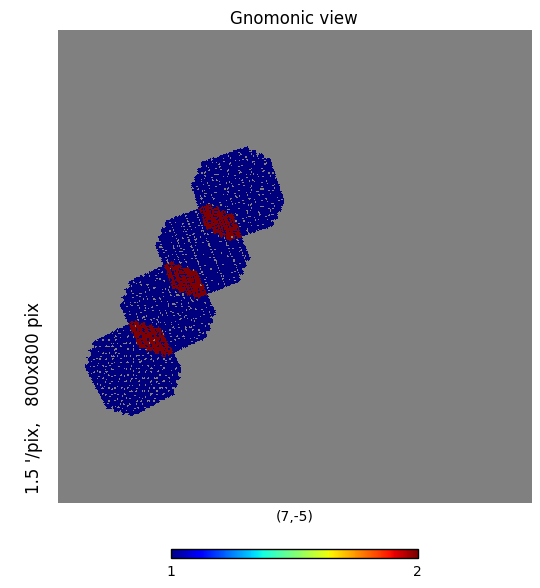

In [33]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
hp.gnomview(bundleList[0].metricValues, xsize=800,ysize=800, rot=(7,-5,0))